## Import dependencies

In [1]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import data preprocessing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

# Import data train model libraries
from sklearn.ensemble import RandomForestClassifier

# Import model evaluation libraries
import itertools
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

In [2]:
df_train = pd.read_csv(f'train.csv')
df_test = pd.read_csv(f'test.csv')

In [3]:
dfc_train = df_train.copy()
dfc_test = df_test.copy()

In [4]:
# # Handling outliers from Fare column

# # Finding quartiles
# Q1 = np.percentile(dfc_train['Fare'], 25)
# Q3 = np.percentile(dfc_train['Fare'], 75)

# outlier_low = Q1 - 1.5 * (Q3 - Q1)
# outlier_high = Q3 + 1.5 * (Q3 - Q1)

# dfc_train = dfc_train[(dfc_train['Fare']> outlier_low) & (dfc_train['Fare']<outlier_high)]
# dfc_train = dfc_train.reset_index(drop=True)
train_row_cnt = dfc_train.shape[0]

(775, 12)


In [5]:
y = dfc_train.Survived
dfc_train.drop(['Survived'], axis = 1, inplace = True) # Dropping extra column

In [6]:
dfc_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
2,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
4,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [7]:
dfm = pd.concat([dfc_train, dfc_test], ignore_index=True)

In [8]:
dfm

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
2,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
4,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
1188,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1189,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1190,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1191,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
dfm.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            248
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          988
Embarked         0
dtype: int64

In [10]:
#drop cabin column
dfm.drop('Cabin', axis=1, inplace=True)

In [11]:
#drop ticket column
dfm.drop('Ticket', axis=1, inplace=True)

In [12]:
#Filling missing value in Embarked column with previous value 
dfm['Embarked'].fillna(method='bfill',inplace=True)

In [13]:
#Filling missing value in Age column with mode value
dfm['Age'].fillna((dfm['Age'].mode()[0]), inplace = True)

In [14]:
#Filling missing value in Fare column with previous value 
dfm['Fare'].fillna(method='bfill',inplace=True)

In [15]:
#Normalizing values within Age column to 0-1 range
column = 'Age'
dfm[column] = (dfm[column] - dfm[column].min()) / (dfm[column].max() - dfm[column].min())    
dfm

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,0.273456,1,0,7.2500,S
1,3,3,"Heikkinen, Miss. Laina",female,0.323563,0,0,7.9250,S
2,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.436302,1,0,53.1000,S
3,5,3,"Allen, Mr. William Henry",male,0.436302,0,0,8.0500,S
4,6,3,"Moran, Mr. James",male,0.273456,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...,...
1188,1305,3,"Spector, Mr. Woolf",male,0.273456,0,0,8.0500,S
1189,1306,1,"Oliva y Ocana, Dona. Fermina",female,0.486409,0,0,108.9000,C
1190,1307,3,"Saether, Mr. Simon Sivertsen",male,0.480145,0,0,7.2500,S
1191,1308,3,"Ware, Mr. Frederick",male,0.273456,0,0,8.0500,S


In [16]:
titan_df = dfm.copy()
titan_train = pd.concat([titan_df.sort_index().iloc[:(train_row_cnt)], y], axis = 1)
titan_test = pd.concat([titan_df.sort_index().iloc[(train_row_cnt):]], axis = 1)

775
(1193, 9)


<bound method NDFrame.head of      PassengerId  Pclass                                          Name  \
0              1       3                       Braund, Mr. Owen Harris   
1              3       3                        Heikkinen, Miss. Laina   
2              4       1  Futrelle, Mrs. Jacques Heath (Lily May Peel)   
3              5       3                      Allen, Mr. William Henry   
4              6       3                              Moran, Mr. James   
..           ...     ...                                           ...   
770          887       2                         Montvila, Rev. Juozas   
771          888       1                  Graham, Miss. Margaret Edith   
772          889       3      Johnston, Miss. Catherine Helen "Carrie"   
773          890       1                         Behr, Mr. Karl Howell   
774          891       3                           Dooley, Mr. Patrick   

        Sex       Age  SibSp  Parch     Fare Embarked  Survived  
0      male  0.

In [17]:
# Check split point of train set
titan_train.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
770,887,2,"Montvila, Rev. Juozas",male,0.336089,0,0,13.00,S,0
771,888,1,"Graham, Miss. Margaret Edith",female,0.235876,0,0,30.00,S,1
772,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.273456,1,2,23.45,S,0
773,890,1,"Behr, Mr. Karl Howell",male,0.323563,0,0,30.00,C,1
774,891,3,"Dooley, Mr. Patrick",male,0.398722,0,0,7.75,Q,0


In [18]:
# Check split point of test set
titan_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
775,892,3,"Kelly, Mr. James",male,0.430039,0,0,7.8292,Q
776,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,0.586622,1,0,7.0000,S
777,894,2,"Myles, Mr. Thomas Francis",male,0.774521,0,0,9.6875,Q
778,895,3,"Wirz, Mr. Albert",male,0.336089,0,0,8.6625,S
779,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,0.273456,1,1,12.2875,S


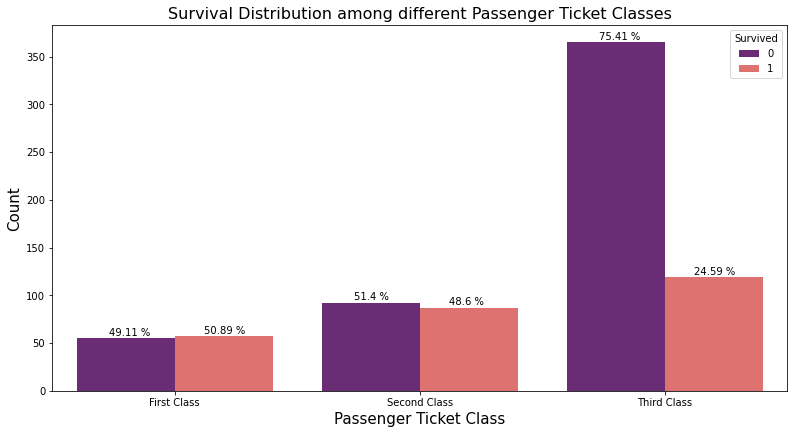

In [19]:
# Creating onject containing Ticket distribution
feature_pc = titan_train.groupby(by = 'Pclass')['Survived'].value_counts()

# Declaring figure size
plt.figure(figsize = (10, 5))

# Declaring color parameters
sns.countplot(data = titan_train, x = 'Pclass',  hue = 'Survived', palette = 'magma')

# Customised percentage labels for each instance

plt.text(x = -0.27, y = feature_pc[1][0] + 3, s = "{} %".format(((feature_pc[1][0]/feature_pc[1].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12, y = feature_pc[1][1] + 3, s = "{} %".format(((feature_pc[1][1]/feature_pc[1].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 1, y = feature_pc[2][0] + 3, s = "{} %".format(((feature_pc[2][0]/feature_pc[2].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12 + 1, y = feature_pc[2][1] + 3, s = "{} %".format(((feature_pc[2][1]/feature_pc[2].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 2, y = feature_pc[3][0] + 3, s = "{} %".format(((feature_pc[3][0]/feature_pc[3].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12 + 2, y = feature_pc[3][1] + 3, s = "{} %".format(((feature_pc[3][1]/feature_pc[3].sum())*100).round(2)), fontsize = 10)

# Plot title:
plt.title('Survival Distribution among different Passenger Ticket Classes', fontsize = 16)

# Label Editing

plt.xticks([0, 1, 2], ['First Class', 'Second Class', 'Third Class'], fontsize = 10)
plt.xlabel('Passenger Ticket Class', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# Padding
plt.tight_layout(pad = -3)

# Show graph
plt.show()

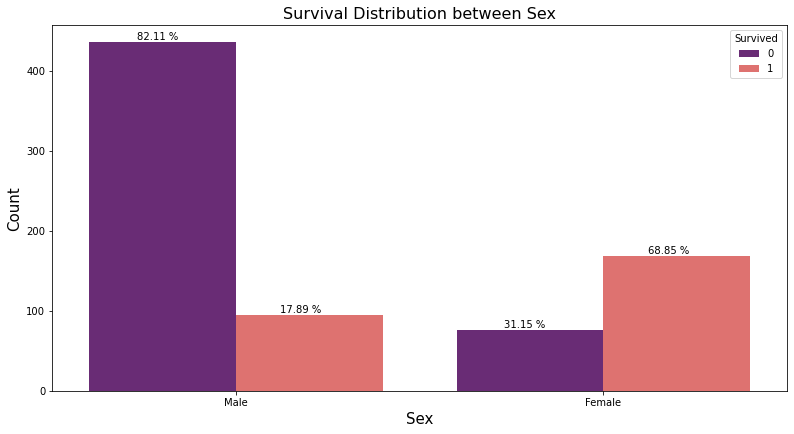

In [20]:
# Relationship between Survival and Sex 

# Creating onject containing Sex distribution
feature_sex = titan_train.groupby(by = 'Sex')['Survived'].value_counts()

# Declaring figure size
plt.figure(figsize = (10, 5))

# Declaring color parameters
sns.countplot(data = titan_train, x = 'Sex',  hue = 'Survived', palette = 'magma')

# Customised percentage labels for each instance

plt.text(x = -0.27, y = feature_sex['male'][0] + 3, s = "{} %".format(((feature_sex['male'][0]/feature_sex['male'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12, y = feature_sex['male'][1] + 3, s = "{} %".format(((feature_sex['male'][1]/feature_sex['male'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 1, y = feature_sex['female'][0] + 3, s = "{} %".format(((feature_sex['female'][0]/feature_sex['female'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12 + 1, y = feature_sex['female'][1] + 3, s = "{} %".format(((feature_sex['female'][1]/feature_sex['female'].sum())*100).round(2)), fontsize = 10)

# Plot title:
plt.title('Survival Distribution between Sex', fontsize = 16)

# Label Editing

plt.xticks([0, 1], ['Male', 'Female'], fontsize = 10)
plt.xlabel('Sex', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# Padding
plt.tight_layout(pad = -3)

# Show graph
plt.show()

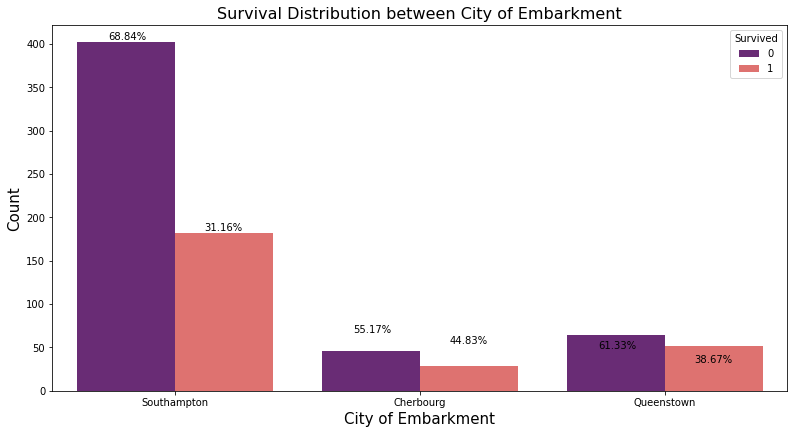

In [21]:
# Relationship between Survival and Embarked 

# Creating onject containing Embarked distribution
feature_embarked = titan_train.groupby(by = 'Embarked')['Survived'].value_counts()

# Declaring figure size
plt.figure(figsize = (10, 5))

# Declaring color parameters
sns.countplot(data = titan_train, x = 'Embarked',  hue = 'Survived', palette = 'magma')

# Customised percentage labels for each instance

plt.text(x = -0.27, y = feature_embarked['S'][0] + 3, s = "{}%".format(((feature_embarked['S'][0]/feature_embarked['S'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12, y = feature_embarked['S'][1] + 3, s = "{}%".format(((feature_embarked['S'][1]/feature_embarked['S'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 1, y = feature_embarked['C'][0] + 3, s = "{}%".format(((feature_embarked['C'][0]/feature_embarked['C'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12 + 1, y = feature_embarked['C'][1] + 3, s = "{}%".format(((feature_embarked['C'][1]/feature_embarked['C'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 2, y = feature_embarked['Q'][0] + 3, s = "{}%".format(((feature_embarked['Q'][0]/feature_embarked['Q'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12 + 2, y = feature_embarked['Q'][1] + 3, s = "{}%".format(((feature_embarked['Q'][1]/feature_embarked['Q'].sum())*100).round(2)), fontsize = 10)

# Plot title:
plt.title('Survival Distribution between City of Embarkment', fontsize = 16)

# Label Editing

plt.xticks([0, 1, 2], ['Southampton', 'Cherbourg', 'Queenstown'], fontsize = 10)
plt.xlabel('City of Embarkment', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# Padding
plt.tight_layout(pad = -3)

# SHow graph
plt.show()

In [22]:
#function to build confusion_matrix,
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
#This function is used to encode categorical column with ONE HOT ENCODING APPROCHE
def oh_encoding(X):
    # Select categorical columns 
    categorical_cols = X.select_dtypes(include='object')

    print(categorical_cols)
    
    # Select numerical columns
    numerical_cols = X.select_dtypes(exclude='object')
    
    numerical_cols.reset_index(inplace=True)
    
    ohe = OneHotEncoder(categories='auto')
    feature_arr = ohe.fit_transform(categorical_cols).toarray()
    feature_labels = ohe.get_feature_names(categorical_cols.columns)

    features = pd.DataFrame(feature_arr, columns=feature_labels)
    
    # Change one hot encoded values to integers
    for value in features.columns:
        features[value] = features[value].astype(int)

    # Add one-hot encoded columns to numerical features
    OH_X = pd.concat([numerical_cols, features], axis=1)
    print(OH_X)
    return OH_X

In [24]:
#select target column 
y = titan_train['Survived']

#select indempendant columns
X = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

In [25]:
#get indempendant column for train data set
X_full = titan_train[X].copy()

#get indempendant column for test data set
X_test = titan_test[X].copy()

#Use train test split approche
X_train, X_valid, y_train, y_valid = train_test_split(oh_encoding(X_full), y,train_size=0.8, test_size=0.2, random_state=0)

0      0
1      1
2      1
3      0
4      0
      ..
770    0
771    1
772    0
773    1
774    0
Name: Survived, Length: 775, dtype: int64
[[0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0.]
 [0. 1. 0. 1. 0.]]
[0 1]
[1 0]
[0 1]
[0 1]
[1 0]


In [26]:
X_test.loc[X_test.index.isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [27]:
X_test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
775,3,male,0.430039,0,0,7.8292,Q
776,3,female,0.586622,1,0,7.0000,S
777,2,male,0.774521,0,0,9.6875,Q
778,3,male,0.336089,0,0,8.6625,S
779,3,female,0.273456,1,1,12.2875,S
780,3,male,0.173243,0,0,9.2250,S
781,3,female,0.373669,0,0,7.6292,Q
782,2,male,0.323563,1,1,29.0000,S
783,3,female,0.223350,0,0,7.2292,C
784,3,male,0.260929,2,0,24.1500,S


In [28]:
#function to find resturn the result of accuracy score for KNeighborsClassifier
def get_rfc(n_estimators, train_X, val_X, train_y, val_y):
    model = model = RandomForestClassifier(n_estimators=n_estimators, max_depth=5, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    ae = accuracy_score(val_y, preds_val)
    return(ae)

In [29]:
# loop to find the ideal n_neighbors size 
scores = {n_size: get_rfc(n_size, X_train, X_valid, y_train, y_valid) for n_size in range(1,100)}
best_n_size = max(scores, key=scores.get)

best_score = scores[best_n_size]
print('Best result at max n_neighbors : ',best_n_size)
print('accuracy score for Random Forest Classifier: ',best_score)

Best result at max n_neighbors :  57
accuracy score for Random Forest Classifier:  0.8


In [30]:
#Build RandomForestClassifier for best scoore at best n_estimators
model_rfc = RandomForestClassifier(n_estimators=best_n_size, max_depth=5, random_state=1)
model_rfc.fit(X_train, y_train)
preds_rfc = model_rfc.predict(X_valid)

Confusion matrix, without normalization
[[38 23]
 [ 8 86]]


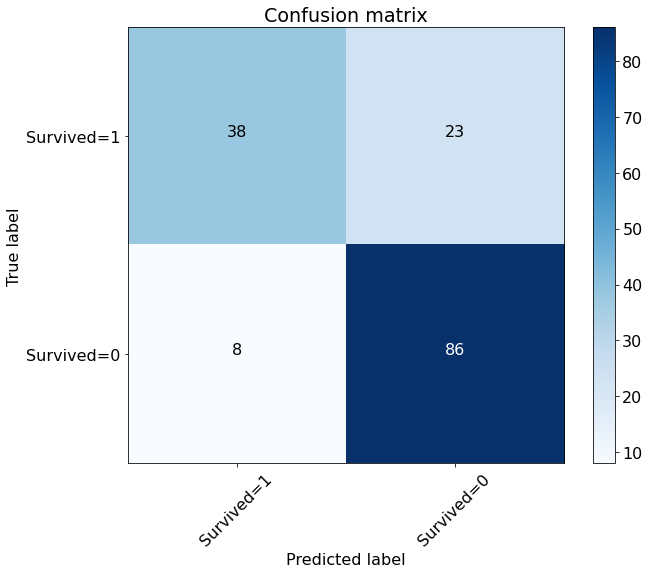

In [31]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_valid,preds_rfc, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,8))
plt.rcParams['font.size'] = '16'
plot_confusion_matrix(cnf_matrix, classes=['Survived=1','Survived=0'],normalize= False,  title='Confusion matrix');

In [32]:
model= RandomForestClassifier(n_estimators=best_n_size, max_depth=5, random_state=1)

# Preprocessing of training data, fit model 
model.fit(oh_encoding(X_full), y)

# Preprocessing of validation data
enc_test = oh_encoding(X_test)

print(enc_test)

# Getting predictions
predictions = model.predict(enc_test)

output = pd.DataFrame({'PassengerId': titan_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

[[0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0.]
 [0. 1. 0. 1. 0.]]
[0 1]
[1 0]
[0 1]
[0 1]
[1 0]
[[0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1.]
 [0. 1. 1. 0. 0.]]
[0 1]
[1 0]
[0 1]
[1 0]
[0 1]
     index  Pclass       Age  SibSp  Parch      Fare  \
0      775       3  0.430039      0      0    7.8292   
1      776       3  0.586622      1      0    7.0000   
2      777       2  0.774521      0      0    9.6875   
3      778       3  0.336089      0      0    8.6625   
4      779       3  0.273456      1      1   12.2875   
..     ...     ...       ...    ...    ...       ...   
413   1188       3  0.273456      0      0    8.0500   
414   1189       1  0.486409      0      0  108.9000   
415   1190       3  0.480145      0      0    7.2500   
416   1191       3  0.273456      0      0    8.0500   
417   1192       3  0.273456      1      1   22.3583   

     onehotencoder__x0_female  onehoten